# Capítulo 4 - Análise de Grupos

In [490]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from scipy.spatial import distance


## Bases de Dados do Capitulo

In [489]:
nomesColunasWine = ["Class","Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
dfWine = pd.read_csv('/mnt/c/Users/edwin/Downloads/wine.data', names=nomesColunasWine)

#Eliminação da da coluna Class
nomesColunasWine = ["Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
dfWine = dfWine[["Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]]

### Resumo do DataFrame

In [491]:
dfWine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Algoritmos de Agrupamento

## Algoritmo K-Médias

Número de Grupos

In [464]:
k = 3

Base de Dados 

In [465]:
dfWine

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Normalização da base de dados

In [466]:
def max_min(max , min, idade):
    novo_max = 1
    novo_min = 0
    valor_normalizado = ((idade - min) / (max - min)) * (novo_max - novo_min) + novo_min
    return valor_normalizado

def normalizacao(dfWine, nomesColunasWine):
    for indexNomeColuna in range(len(nomesColunasWine)):
        max_ = max(dfWine[nomesColunasWine[indexNomeColuna]])
        min_ = min(dfWine[nomesColunasWine[indexNomeColuna]])

        lista_coluna_normalizada = []
        for valor in dfWine[nomesColunasWine[indexNomeColuna]]:            
            lista_coluna_normalizada.append(max_min(max_, min_, valor))
        
        
        #Inserção de uma nova coluna no dataframe com o valor normalizado        
        #dfWine.insert(indexNomeColuna, nomesColunasWine[indexNomeColuna]+"__", lista_coluna_normalizada)
        dfWine[nomesColunasWine[indexNomeColuna]] = lista_coluna_normalizada
    return dfWine

Dataframe original

In [467]:
dfWine.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Dataframe normalizado

In [468]:
dfWineNormalizado = dfWine.copy(deep=True)
dfWineNormalizado = normalizacao(dfWineNormalizado, nomesColunasWine)
dfWineNormalizado.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


In [469]:
_max = max(dfWine['Ash'])
_min = min(dfWine['Ash'])
max_min(_max,_min, 2.74)

0.7379679144385027

PCA

In [475]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfWineNormalizado)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['x', 'y'])

principalDf

,x,y
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


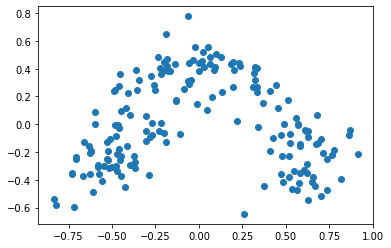

In [476]:
plt.scatter(principalDf["x"], principalDf["y"])

Correlação de Pearson

In [311]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from numpy import cov, std
# seed random number generator
seed(1)
# prepare data

# calculate Pearson's correlation
corr, _ = pearsonr(dfWineNormalizado['Alcohol'], dfWineNormalizado['Malic acid'])
print('Pearsons correlation: %.3f' % corr)

#pc = cov(dfWineNormalizado['Alcohol'], dfWineNormalizado['Malic acid'])/(std(dfWineNormalizado['Alcohol'])*std(dfWineNormalizado['Malic acid']))
#print('Pearsons correlation: ', pc)



Pearsons correlation: 0.094


Função de Custo 

In [448]:
def funcao_custo(dados,rotulo, centroides):
  #print("FC")
  fc = 0
  for i in range(len(dados)):
    #print(dados[i])
    #print(rotulo[i])
    #print(centroides[int(rotulo[i])])
    fc+= distance.euclidean(dados[i],centroides[int(rotulo[i])])
  return fc

Função da distância entre os centroides e os objetos - D (n x k)

In [447]:
def dist(dados, centroides):
  D = []
  for obj in dados.values:
    DAux = []
    for c in centroides.values:
      DAux.append(distance.euclidean(obj,c))
    D.append(DAux)
  return D
#len(dist(dfRuspini,C))

Funcao de Media dos objetos

In [446]:
def media(dados):
  xm = 0
  ym = 0
  for d in dados.values:
    xm+=d[0]
    ym+=d[1]
  xm=xm/len(dados)
  ym=ym/len(dados)

  return [xm,ym]

Posicao inicial dos Centroides obtidos aleatoriamente (Verificar valores iguais para os centroides)

In [479]:
idx = np.random.randint(0,len(principalDf),k)
idx

array([156, 157, 113])

Inicializar as Variáveis

In [482]:
C = principalDf[['x', 'y']].loc[idx]
print(C)
C = C.astype(np.float64)
G = np.zeros(len(principalDf.values))
dif_fc = 1
fc=0
it = 0
C

            x         y
156  0.650980 -0.412212
157  0.713431 -0.204371
113  0.099220  0.507022


,x,y
156,0.650980,-0.412212
157,0.713431,-0.204371
113,0.099220,0.507022


Algorítmo

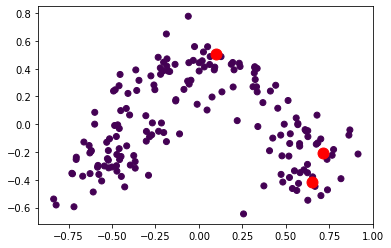

In [484]:
plt.scatter(principalDf["x"], principalDf["y"],c=G)
plt.scatter(C.values[:,0],C.values[:,1],s = 120,c='red')
plt.show()

In [487]:
while dif_fc != 0:
  print(it)
  #Calcular a Distancia entre os Centroides e os Objetox
  D = dist(principalDf,C)
  #Determinar o Centroide mais perto para cada objeto
  for i in range(len(principalDf.values)):
    #print(D[i])
    #print(np.argmin(D[i]))
    G[i] = np.argmin(D[i])
    
  #Atualizar a posicao dos Centroides
  for i in range(k):
    #Encontrar os objetos de cada grupo
    ids = []
    for j in range(len(principalDf.values)):
      if G[j]==i :
        ids.append(j)
    #Calcular o ponto médio do grupo
    C.values[i] = media(principalDf.loc[ids])
  #Calcular o nova funcao de custo do novo agrupamento
  fc_nova = funcao_custo(principalDf.values,G,C.values)

  #Atualizando as variáveis de controle
  if fc == 0:
    dif_fc = fc_nova
  else:
    dif_fc = fc - fc_nova
  fc = fc_nova
  it=it+1


0
1
2
3
4
5
6
7
8


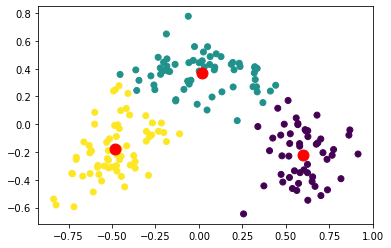

In [488]:
plt.scatter(principalDf["x"], principalDf["y"],c=G)
plt.scatter(C.values[:,0],C.values[:,1],s = 120,c='red')
plt.show()

## Índice de Dunn

### Indice de Dunn para o Agrupamento Original

Recriando um agrupamento (Original)

In [458]:
originalA = []
originalB = []
originalC = []
originalD = []
labelOriginal = []
for i in range(0,20):
  originalA.append(i)
  labelOriginal.append(0)
for i in range(20,35):
  originalB.append(i)
  labelOriginal.append(1)
for i in range(35,58):
  originalC.append(i)
  labelOriginal.append(2)
for i in range(58,75):
  originalD.append(i)
  labelOriginal.append(3)
print(originalA)
print(originalB)
print(originalC)
print(originalD)
print(labelOriginal)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Visualizando o agrupamento original 

ValueError: 'c' argument has 75 elements, which is inconsistent with 'x' and 'y' with size 178.

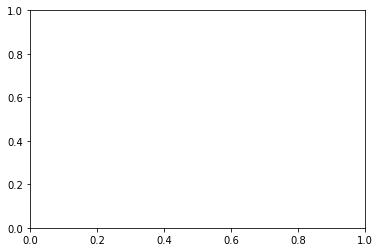

In [459]:
plt.scatter(
    principalDf['x'], principalDf['y'],
    s=50, c=labelOriginal,
    marker='s', edgecolor='black',
    label='cluster 0'
)

Calculo do Intra Gi

In [ ]:
#Numero de Grupos
k = 4
dfLabelOriginal = pd.DataFrame(labelOriginal)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfRuspini.iloc[dfLabelOriginal[dfLabelOriginal[0]==i].index].values

  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos


[40.24922359499622, 27.073972741361768, 36.61966684720111, 47.634021455258214]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

47.634021455258214

Calculo do Minino Intergrupos

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfRuspini.iloc[dfLabelOriginal[dfLabelOriginal[0]==i].index].values, dfRuspini.iloc[dfLabelOriginal[dfLabelOriginal[0]==j].index].values))

interGrupos

[67.75052265858555,
 85.64718438219715,
 93.56585339719659,
 129.5819060424859,
 100.71741881856003,
 64.42554862511201]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

64.42554862511201

Calculo de Dunn para o Agrupamento Original 

In [ ]:
indDunnOriginal = minInterGrupos/maxIntraGrupos
indDunnOriginal

1.3525112232152345

###Indice de Dunn para o agrupamento KMedias

Labels do Agrupamento Obtidp

In [ ]:
labelObtido = G.astype(int)
labelObtido

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Visualizando o Agrupamento Obtido

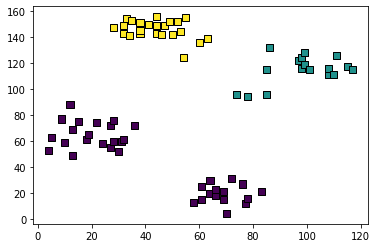

In [ ]:
plt.scatter(
    dfRuspini['x'], dfRuspini['y'],
    s=50, c=labelObtido,
    marker='s', edgecolor='black',
    label='cluster 0'
)

Calculo do Intra Gi

In [ ]:
#Numero de Grupos
k = 3
dfLabelObtido = pd.DataFrame(labelObtido)
intraGrupos = []

for i in range(k):
  objetosGrupoi = dfRuspini.iloc[dfLabelObtido[dfLabelObtido[0]==i].index].values

  distanciasIntraGi = []
  for i1 in range(len(objetosGrupoi)):
    for i2 in range(i1+1,len(objetosGrupoi)):
      distanciasIntraGi.append(distance.euclidean(objetosGrupoi[i1],objetosGrupoi[i2]))

  intraGrupos.append(max(distanciasIntraGi))

intraGrupos



[102.07840124139877, 47.634021455258214, 36.61966684720111]

In [ ]:
maxIntraGrupos = max(intraGrupos)
maxIntraGrupos

102.07840124139877

Calculo do Minino Intergrupos

In [ ]:
def interGiGj(grupoI, grupoJ):
  soma = 0
  for i in range(len(grupoI)):
    for j in range(len(grupoJ)):
      soma+=distance.euclidean(grupoI[i],grupoJ[j])
  
  return soma*(1/(len(grupoI)*len(grupoJ)))


In [ ]:
interGrupos = []
for i in range(k):
  for j in range(i+1,k):
    interGrupos.append(interGiGj(dfRuspini.iloc[dfLabelObtido[dfLabelObtido[0]==i].index].values, dfRuspini.iloc[dfLabelObtido[dfLabelObtido[0]==j].index].values))

interGrupos

[96.63081000635235, 104.47635080803528, 64.42554862511201]

In [ ]:
minInterGrupos = min(interGrupos)
minInterGrupos

64.42554862511201

Calculo de Dunn para o Agrupamento Obtido

In [ ]:
indDunnObtido = minInterGrupos/maxIntraGrupos
indDunnObtido

0.6311379081335345

##Índice da Silhueta

###Índice da Silhueta para o Agrupamento Original

Definindo Funcoes 

In [ ]:
def A(j,dados, labels):
  soma = 0
  grupoJ = labels.loc[j].values[0]
  for dadosGrupo in dados.iloc[labels[labels[0]==grupoJ].index].values:
    soma += distance.euclidean(dados.iloc[labels[labels[0]==grupoJ].index].loc[j], dadosGrupo)
  return soma/(len(dados.iloc[labels[labels[0]==grupoJ].index].values)-1)

In [ ]:
def B(k,i,j,dados,labels):
  grupos = list(range(k))
  grupos.remove(i)
  distanciasMediasGrupos = []
  for grupo in grupos:
    soma=0
    for dado in dados.iloc[labels[labels[0]==grupo].index].values:
      soma+= distance.euclidean(dados.iloc[labels[labels[0]==i].index].loc[j],dado)
    distanciasMediasGrupos.append(soma/len(dados.iloc[labels[labels[0]==grupo].index].values))
  return min(distanciasMediasGrupos)

Obtendo o valor da Silhueta de um Objeto

> Bloco com recuo



In [ ]:
#Escoha do indice do objeto
j=31

i = dfLabelOriginal.loc[j].values[0]
k=4
aj = A(j,dfRuspini,dfLabelOriginal)
bj = B(k,i,j,dfRuspini,dfLabelOriginal)

round((bj-aj)/max([bj,aj]),2)


0.8

Obtendo o Valor da Silhueta um Grupo

In [ ]:
#Escolha do indice do Grupo, sendo k-1 o valor maximo
i = 3

k = 4

somaSilhGrupo = 0
for j in dfLabelOriginal[dfLabelOriginal[0]==i].index:
  aj = A(j,dfRuspini,dfLabelOriginal)
  bj = B(k,i,j,dfRuspini,dfLabelOriginal)

  somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

round(somaSilhGrupo/len(dfLabelOriginal[dfLabelOriginal[0]==i].index),2)


0.67

Obtendo o Índice da Silhueta para o Agrupamento Original 

In [ ]:
k = 4

somaSilhAgrupamento = 0
for i in range(k):
  somaSilhGrupo = 0
  for j in dfLabelOriginal[dfLabelOriginal[0]==i].index:
    aj = A(j,dfRuspini,dfLabelOriginal)
    bj = B(k,i,j,dfRuspini,dfLabelOriginal)

    somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

  somaSilhAgrupamento += round(somaSilhGrupo/len(dfLabelOriginal[dfLabelOriginal[0]==i].index),2)

IndiceSilhOriginal = round(somaSilhAgrupamento/k,2)
IndiceSilhOriginal

0.74

###Índice da Silhueta para o Agrupamento Obtido

Definindo Funcoes 

In [ ]:
def A(j,dados, labels):
  soma = 0
  grupoJ = labels.loc[j].values[0]
  for dadosGrupo in dados.iloc[labels[labels[0]==grupoJ].index].values:
    soma += distance.euclidean(dados.iloc[labels[labels[0]==grupoJ].index].loc[j], dadosGrupo)
  return soma/(len(dados.iloc[labels[labels[0]==grupoJ].index].values)-1)

In [ ]:
def B(k,i,j,dados,labels):
  grupos = list(range(k))
  grupos.remove(i)
  distanciasMediasGrupos = []
  for grupo in grupos:
    soma=0
    for dado in dados.iloc[labels[labels[0]==grupo].index].values:
      soma+= distance.euclidean(dados.iloc[labels[labels[0]==i].index].loc[j],dado)
    distanciasMediasGrupos.append(soma/len(dados.iloc[labels[labels[0]==grupo].index].values))
  return min(distanciasMediasGrupos)

Obtendo o valor da Silhueta de um Objeto

In [ ]:
#Escoha do indice do objeto
j=49

i = dfLabelObtido.loc[j].values[0]
k=3
aj = A(j,dfRuspini,dfLabelObtido)
bj = B(k,i,j,dfRuspini,dfLabelObtido)

round((bj-aj)/max([bj,aj]),2)


0.82

Obtendo o Valor da Silhueta um Grupo

In [ ]:
#Escolha do indice do Grupo, sendo k-1 o valor maximo
i = 2

k = 3

somaSilhGrupo = 0
for j in dfLabelObtido[dfLabelObtido[0]==i].index:
  aj = A(j,dfRuspini,dfLabelObtido)
  bj = B(k,i,j,dfRuspini,dfLabelObtido)

  somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

round(somaSilhGrupo/len(dfLabelObtido[dfLabelObtido[0]==i].index),2)


0.75

Obtendo o Índice da Silhueta para o Agrupamento Obtido 

In [ ]:
k = 3

somaSilhAgrupamento = 0
for i in range(k):
  somaSilhGrupo = 0
  for j in dfLabelObtido[dfLabelObtido[0]==i].index:
    aj = A(j,dfRuspini,dfLabelObtido)
    bj = B(k,i,j,dfRuspini,dfLabelObtido)

    somaSilhGrupo += round((bj-aj)/max([bj,aj]),2)

  somaSilhAgrupamento += round(somaSilhGrupo/len(dfLabelObtido[dfLabelObtido[0]==i].index),2)

IndiceSilhOriginal = round(somaSilhAgrupamento/k,2)
IndiceSilhOriginal

0.65

##Algorítmo K-Medoides

Número de Grupos

In [ ]:
k = 4

Base de Dados 

In [ ]:
dfRuspini 

,x,y
0,4,53
1,5,63
2,9,77
3,10,59
4,12,88
...,...,...
70,108,116
71,110,111
72,111,126
73,115,117


Função de Custo 

In [ ]:
def funcao_custo_medoides(dados, indiceMedoides):
  fc = 0
  medoides = dfRuspini.iloc[indiceMedoides].values

  for i in range(len(dados)):
    distancias  = []
    for j in range(k):
      distancias.append(distance.euclidean(dados[i],medoides[j]))
    fc+=min(distancias)
    
  return fc

Função da distância entre os centroides e os objetos - D (n x k)

In [ ]:
def dist(dados, centroides):
  D = []
  for obj in dados.values:
    DAux = []
    for c in centroides.values:
      DAux.append(distance.euclidean(obj,c))
    D.append(DAux)
  return D


Posicao inicial dos Centroides obtidos aleatoriamente (Verificar valores iguais para os centroides)

In [ ]:
idx = np.random.randint(0,len(dfRuspini),k)
idx

array([48, 43, 36,  0])

Inicializar as Variáveis

In [ ]:
M = idx.copy()
G = np.zeros(len(dfRuspini.values))
dif_fc = 1
fc=funcao_custo_medoides(dfRuspini.values, M)
it = 0
itMax = 50

Algoritmo

In [ ]:
while it<itMax:
  #Escolher, aleatoriamente, um novo objeto como medoide
  novo = np.random.randint(0,len(dfRuspini))
  #Trocar o novo medoide por um existente
  M2 = M.copy()
  pos = np.random.randint(0,k)
  M2[pos] = novo

  #Calcular valor da função de custo do novo agrupamento
  fc_nova = funcao_custo_medoides(dfRuspini.values, M2)

  #Se o valor da nova função for menor, atualize as variáveis
  if fc_nova<fc:
    M = M2.copy()
    fc = fc_nova # Armazenar o valor da funcao para proxima iteração

  #atualizar variável de controle
  it = it+1

Fazer os Rótulos

In [ ]:
D = dist(dfRuspini,dfRuspini.iloc[M])
for i in range(len(dfRuspini.values)):
    G[i] = np.argmin(D[i])
G

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

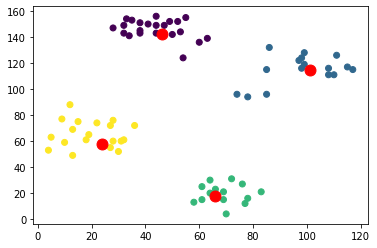

In [ ]:
plt.scatter(dfRuspini["x"], dfRuspini["y"],c=G)
plt.scatter(dfRuspini.iloc[M].values[:,0],dfRuspini.iloc[M].values[:,1],s = 120,c='red')
plt.show()

##DBSCAN

Quantidade mínima de objetos na vizinhança

In [ ]:
minPts = 3

Raio da Vizinhança

In [ ]:
raio = 20

Funcao que calcula a distancia entre os objetos da base D(n x n)

In [ ]:
def dist(data):
  D = []
  for x1 in data:
    linhaD = []
    for x2 in data:
      linhaD.append(distance.euclidean(x1,x2))
    D.append(linhaD)
  return D

Primeiros Passos

In [ ]:
D = dist(dfRuspini.values)
visitado = np.zeros(len(dfRuspini))
rotulo = 1
G = -1*np.ones(len(dfRuspini))


Algorítmo

In [ ]:
for i in range(len(dfRuspini.values)):
  if visitado[i] == 0:
    visitado[i] = 1

    vizinhos = []
    for j in range(len(dfRuspini.values)):
      if D[i][j]<=raio:
        vizinhos.append(j)
    
    if len(vizinhos)>=minPts:
      G[i] =rotulo
      v=0
      while v<len(vizinhos):
        if (visitado[vizinhos[v]]==0) or (G[vizinhos[v]]==-1):
          aux  = [] 
          for j2 in range(len(dfRuspini.values)):
            if D[vizinhos[v]][j2] <=raio :
              vizinhos.append(j2)

          visitado[vizinhos[v]] = 1
        G[vizinhos[v]] = rotulo
        v+=1
      rotulo+=1

In [ ]:
G

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4.])

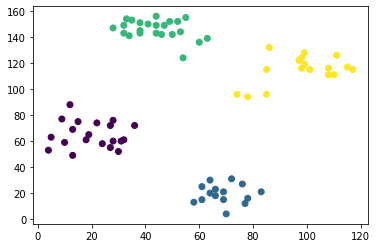

In [ ]:
plt.scatter(dfRuspini["x"], dfRuspini["y"],c=G)
plt.show()

## K-Means usando Scikit Learn

In [387]:

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dfWineNormalizado)

In [388]:
y_km

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [389]:
dfWineNormalizado[y_km == 0]['Alcohol']

4      0.581579
21     0.500000
25     0.531579
43     0.581579
63     0.352632
66     0.547368
69     0.310526
71     0.744737
73     0.515789
74     0.244737
79     0.439474
81     0.444737
84     0.213158
93     0.331579
94     0.155263
95     0.378947
98     0.352632
99     0.331579
102    0.344737
109    0.152632
110    0.113158
111    0.392105
120    0.110526
121    0.139474
122    0.365789
123    0.531579
124    0.221053
125    0.273684
126    0.368421
Name: Alcohol, dtype: float64

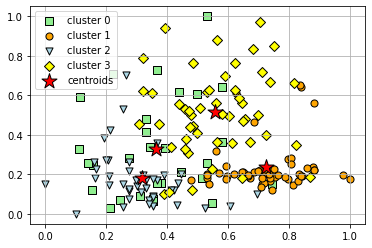

In [390]:
plt.scatter(
    dfWineNormalizado[y_km == 0]['Alcohol'], dfWineNormalizado[y_km == 0]['Malic acid'],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    dfWineNormalizado[y_km == 1]['Alcohol'], dfWineNormalizado[y_km == 1]['Malic acid'],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    dfWineNormalizado[y_km == 2]['Alcohol'], dfWineNormalizado[y_km == 2]['Malic acid'],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    dfWineNormalizado[y_km == 3]['Alcohol'], dfWineNormalizado[y_km == 3]['Malic acid'],
    s=50, c='yellow',
    marker='D', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## DBScan usando Scikit Learn

In [391]:
from sklearn.cluster import DBSCAN

#nomesColunasRuspini = ["x","y"]
#dfRuspini = pd.read_csv('https://raw.githubusercontent.com/xbarretox/DM-AD/main/ruspini.csv', names = nomesColunasRuspini)

db = DBSCAN(eps = 20, min_samples=3).fit(dfWineNormalizado)

db.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

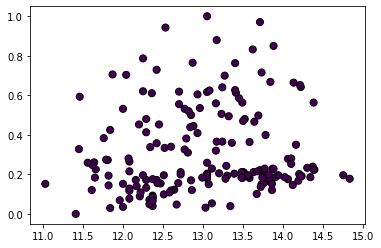

In [375]:
plt.scatter(
    dfWine['Alcohol'], dfWineNormalizado['Malic acid'],
    s=50, c=db.labels_,
    marker='o', edgecolor='black'
)